# Analysis of Titanic incident 

In [90]:
import pandas as pd
import numpy as np

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
train = pd.read_csv('titanic_train.csv')

In [93]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<span style="font-family:Times New Roman">  

# Data Analysis 
#### The Titanic dataframe consists of the following columns: 
#### The column containing passenger identification numbers, the survival status denoted by zero or one indicating whether they survived, and the passenger class which determines if they are in first, second, or third class on the ship. Following that, we see the passenger's name, gender, and age details. SinSP shows how many siblings or spouses are present, while Parch shows the number of parents or children aboard. Next comes the ticket number and the passengers' Fare, which indicates the amount they spent on the ticket. The cabin is the one they were inside, and 'embarked' is the term used for the port of embarkation. 

#### We will utilize Seaborn to generate a heatmap illustrating the areas with missing data.   
 </span>

<Axes: >

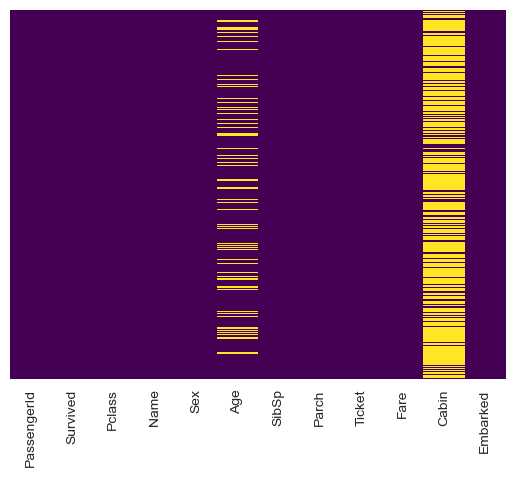

In [94]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

<span style="font-family:Times New Roman">  
 
#### Every yellow line here is a True value, which means that it is null. It is evident from the heatmap that there are missing Age data and a considerable amount of cabin information. Roughly 25% of the Age data is not available, but it's feasible to use information from other fields to input logical values for the missing ages. Upon examining the Cabin column, it appears that there is a significant amount of missing data, rendering it unusable for basic analysis. Later on, we might remove this column or replace it with a different feature, such as a cabin indicator set to either one or zero. For now, let's do some more data analysis at a visual level.    
 </span>

In [95]:
sns.set_style('whitegrid')

<span style="font-family:Times New Roman">  
 
#### Our initial goal is to determine the individuals who lived through the event and those who did not. For classification problems, it's always a good idea to see the ratio of the actual target labels. This task is accomplished through the utilization of a count plot.
 </span>

<Axes: xlabel='Survived', ylabel='count'>

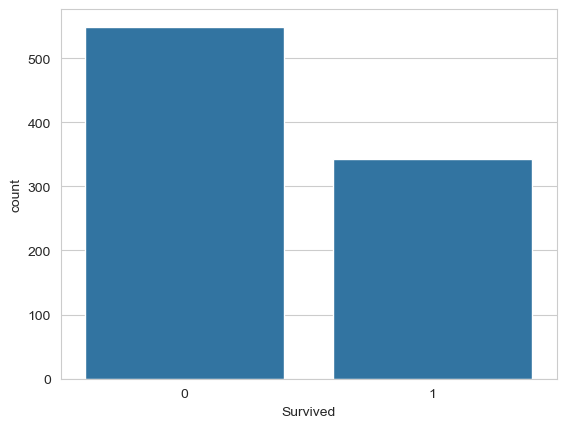

In [96]:
sns.countplot(x='Survived', data=train)

<span style="font-family:Times New Roman">  
 
#### In this data, it is evident that the number of individuals who perished is significantly higher compared to those who survived. It appears that there are approximately 550 passengers who did not make it, while there are around 350 or slightly fewer who did survive. The count plot indicates a lower number of survivors. Another count plot is coming up, this time showing survival rates categorized by gender. 
 </span>

<Axes: xlabel='Survived', ylabel='count'>

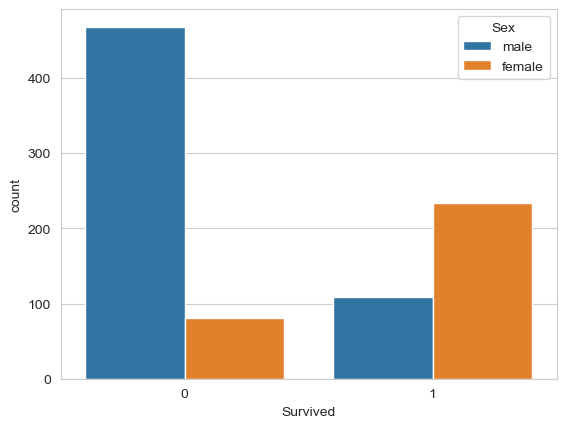

In [97]:
sns.countplot(x='Survived',hue='Sex',data=train)

<span style="font-family:Times New Roman">  
 
#### The trend displayed in the plot above is evident. Males were more prone to not surviving, while females had double the chance of surviving. If we change the hue to passenger class we have the following count plot.
 </span>

<Axes: xlabel='Survived', ylabel='count'>

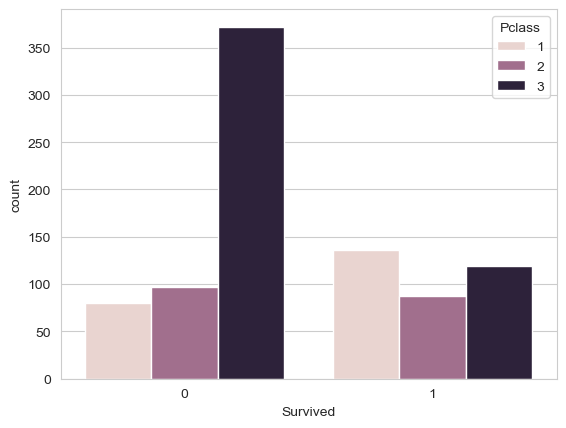

In [98]:
sns.countplot(x='Survived',hue='Pclass',data=train)

<span style="font-family:Times New Roman">  
 
#### It appears that the majority of the deceased were passengers from third class or the most affordable lower class. It appears that the individuals who managed to stay alive were predominantly from the upper social strata, specifically the first and second classes. Our aim is to determine the number of individuals in each passenger category. Let's head out and gather information on the age of individuals aboard the Titanic. To do that we can go and do a distribution-type plot. We employ dropna to eliminate any missing data.
 </span>

<Axes: ylabel='Frequency'>

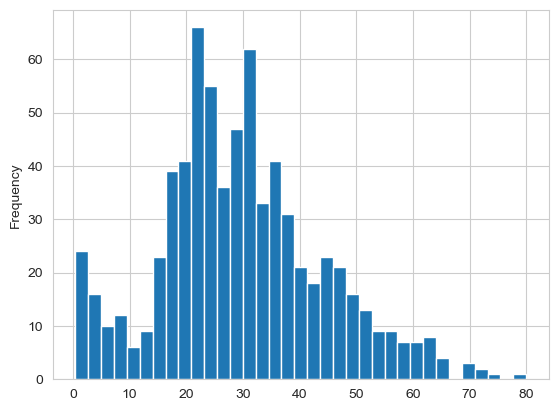

In [99]:
#sns.distplot(train['Age'].dropna(),kde=False,bins=30)
train['Age'].plot.hist(bins=35)

<span style="font-family:Times New Roman">  
 
#### There exists a considerable amount of children from zero to ten years old. Subsequently, an average age of around twenty to thirty years old became apparent. The board is skewed in favor of younger members, with older individuals being less represented. 
 </span>

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

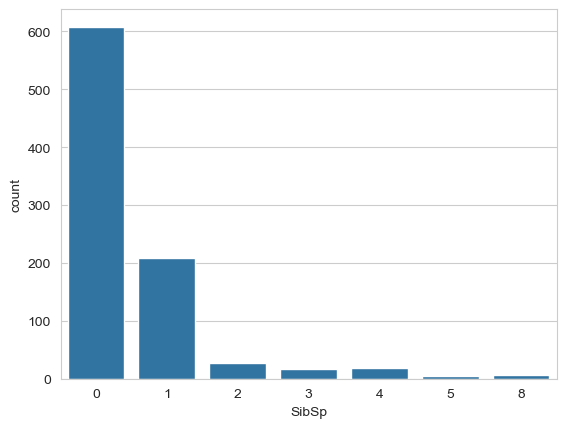

In [101]:
sns.countplot(x='SibSp', data=train)

<span style="font-family:Times New Roman">  
 
#### The above count plot reveals that the majority of individuals were not accompanied by children or spouses. The most popular option is one which is likely to be a spouse versus having children on board. In the upcoming graph, you will see the distribution of amounts paid by people.
 </span>

<Axes: >

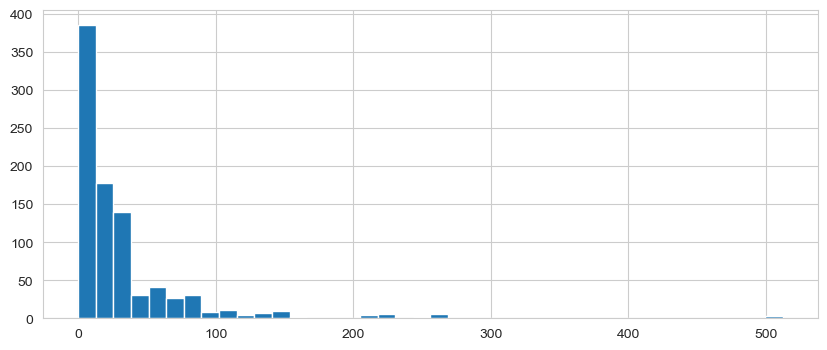

In [102]:
train['Fare'].hist(bins=40, figsize=(10,4))

<span style="font-family:Times New Roman">  
 
#### Now looks like most of the purchase prices are between zero and fifty. The closer data gets to a lower cost, the more it tends to be spread out. A large portion of passengers choose to travel in the less expensive third-class section. Bear in mind that these fares are from the era of the Titanic in 1912 and have not been updated for inflation. 

#### The subsequent graph is an interactive representation of the prior graph, enhanced by cufflinks.
 </span>

In [103]:
import cufflinks as cf

In [104]:
cf.go_offline()

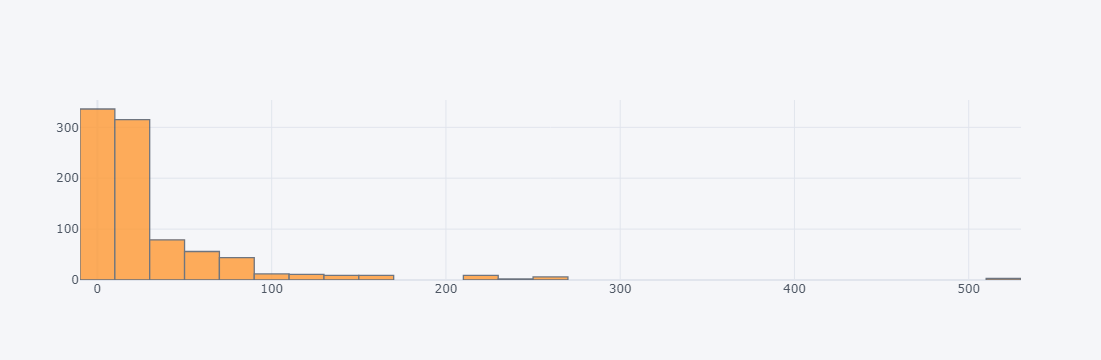

In [105]:
train['Fare'].iplot(kind='hist',bins=30)

<span style="font-family:Times New Roman">
    
# Data Cleaning
#### Up to this point, our attention has been on examining the data using visual representations, and in some cases, we discovered that there are gaps in the data. Our focus is shifting from data cleaning to preparing our data for machine learning algorithms. 

#### Instead of discarding incomplete age information, we aim to complete the age column by inserting the average age of all passengers. This process is referred to as imputation, where you can simply use the average age to complete the missing data. Nevertheless, we could take it a notch higher by examining the mean age of each passenger class.
 </span>

<Axes: xlabel='Pclass', ylabel='Age'>

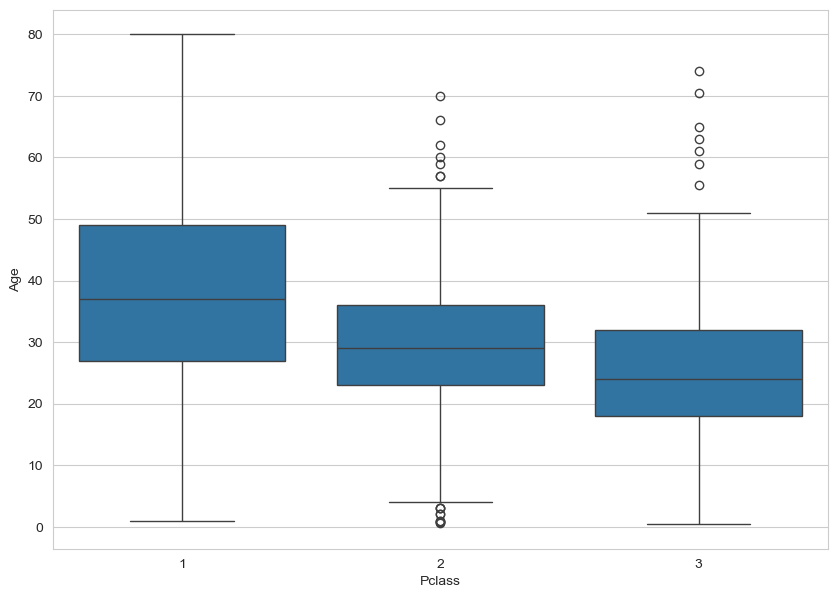

In [106]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

<span style="font-family:Times New Roman">  
 
#### It is evident from the data that the older passengers are more likely to be found in the wealthier first and second class compartments when compared to the third class. Perhaps it is logical that accumulating enough wealth to move up social classes requires a certain amount of time or age. Therefore, with sufficient time to amass a significant amount of riches, you will be older and have a higher chance of being in the premium class. 

#### These mean age figures are helpful for estimating passengers' ages according to their class. To implement this, we create a function.
 </span>

In [107]:
def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24
    else:
       return Age 
            
            
    

In [108]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

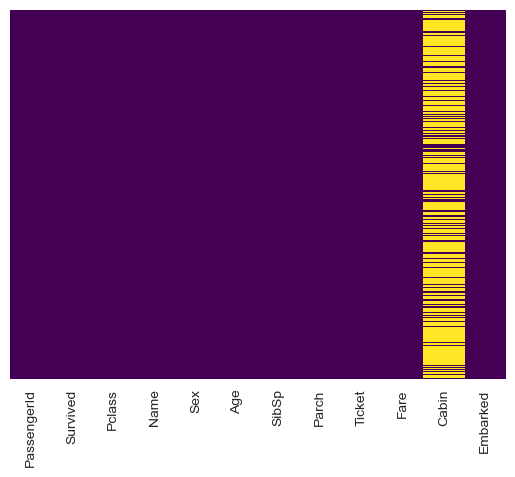

In [109]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<span style="font-family:Times New Roman">  
 
#### Seems like we've finally filled in all the gaps in the age data. We accurately estimated individuals' ages by inputting sensible assumptions according to their social status.

#### The problem we are facing involves the cabin column, with an excessive number of absent data points hindering any meaningful analysis of this column. Perhaps we should consider implementing a new function indicating whether the cabin is occupied or not. Due to the significant amount of missing details, the best course of action is to eliminate the cabin column.
 </span>

In [110]:
train.drop('Cabin',axis=1,inplace=True)

In [111]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<span style="font-family:Times New Roman">  
 
#### Upon rerunning the heatmap, we observe a uniform color indicating the absence of any missing data. We have completed the initial stage of data cleaning by addressing any missing information. Our next step involves handling categorical features by transforming them into dummy variables through pandas. If not, our machine learning algorithm cannot accept those features as inputs directly. For instance, when looking at the gender category, we observe a classification of either male or female. A machine learning program cannot simply process a single word like 'male' or 'female'. It is necessary to establish a fresh column that denotes the gender of a person as male or not, assigning a value of zero or one, to encode this data in a manner understandable by machine learning models. And this is known as creating a dummy variable. The embarked column will experience a similar situation.
 </span>

In [112]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [113]:
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [114]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [115]:
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [116]:
train = pd.concat([train,sex,embark],axis=1)

In [117]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


<span style="font-family:Times New Roman">  
 
#### Columns like the ticket column or name column will remain unused. We will eliminate the columns that are not useful to us since there isn't much relevant information available. Such as Sex, Embarked, Name, and Ticket.
 </span>

In [148]:
#train.drop(['Embarked'],inplace=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

KeyError: "['Sex', 'Embarked', 'Name', 'Ticket'] not found in axis"

In [127]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

In [128]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


<span style="font-family:Times New Roman">  
 
#### Our final focus will be on the initial numeric section labeled passenger identification. Notice that passenger Id is essentially just an index that starts at 1. Upon examining the end of our data frame, we observe a similar pattern with an index starting at 1. This indicates that the numerical values do not serve as a reliable index for predicting passenger survival based solely on their position in the index. Therefore, we will drop the passenger Id.
 </span>

In [129]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,True,False,True
887,888,1,1,19.0,0,0,30.00,False,False,True
888,889,0,3,24.0,1,2,23.45,False,False,True
889,890,1,1,26.0,0,0,30.00,True,False,False
890,891,0,3,32.0,0,0,7.75,True,True,False


In [132]:
train.drop('PassengerId',axis=1, inplace=True )

KeyError: "['PassengerId'] not found in axis"

In [133]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


<span style="font-family:Times New Roman">  
 
#### In conclusion, we verify all our columns if they are in good condition. We have  survived column which is 0 or 1. It's beneficial as it serves as the column we use for labeling.

#### The Pclass column serves as a numeric representation of the passengers' class. In the dataset, there is a column indicating the passenger's age. SibSp refers to the number of siblings or spouses accompanying them during the journey. Parch indicates the number of parents or children present on board. Fare column which shows how much they paid for the ticket. The male column displays their gender as male or not. S indicates the point of departure, either from S or Q. 

# Train and use the model 

#### Our initial step involves dividing our information into X and Y categories. The survived column, denoted as Y, is the target for our prediction. We aim to generate a value of either zero or one in the survived column. And X is going to be featured.

 </span>

In [135]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [137]:
from sklearn.model_selection import train_test_split


In [138]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<span style="font-family:Times New Roman">  
    
#### The following stage is to train and make predictions using a model that is created.  
 </span>


In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
logmodel = LogisticRegression()

<span style="font-family:Times New Roman">  
    
#### The following action is to proceed with the training of the model.    
 </span>


In [141]:
logmodel.fit(X_train,y_train)

C:\Users\rojin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

<span style="font-family:Times New Roman">  
    
#### Following that, we move on to make predictions based on our X_test dataset.   
 </span>


In [142]:
predictions = logmodel.predict(X_test)

<span style="font-family:Times New Roman">  
    
#### Creating the model, adjusting it, and making predictions were accomplished.
# Model evaluation

#### Next, we will assess our model. Sklearn offers a useful classification report for classification tasks. This report provides details on precision, recall, accuracy, F1 scores, and more.
 </span>


In [143]:
from sklearn.metrics import classification_report

In [145]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [146]:
from sklearn.metrics import confusion_matrix

In [147]:
confusion_matrix(y_test,predictions)

array([[133,  21],
       [ 38,  76]], dtype=int64)

<span style="font-family:Times New Roman">  
     
# Conclusion
#### Logistic regression was employed to forecast survival rates, achieving an accuracy level of 86% and a harmonic mean (F1 score) of 82%, indicating a robust and dependable model.

 </span>